In [35]:
import matplotlib.pyplot as plt
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local
from skimage.filters import sobel
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage import exposure
from skimage.transform import rescale,resize
from skimage import morphology
from skimage.restoration import inpaint 
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle
from skimage.restoration import denoise_bilateral
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage import measure
from skimage.feature import canny
from skimage.feature import corner_harris,corner_peaks
from skimage.feature import Cascade
from skimage.data import download_all
from skimage.data import lbp_frontal_face_cascade_filename
#download_all()
from matplotlib.patches import Rectangle


In [36]:
apples_image=plt.imread('apples.jpg')

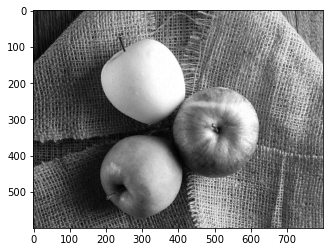

In [37]:
red=apples_image[:,:,0]
green=apples_image[:,:,1]
blue=apples_image[:,:,2]
plt.imshow(red,cmap='gray')
plt.show()





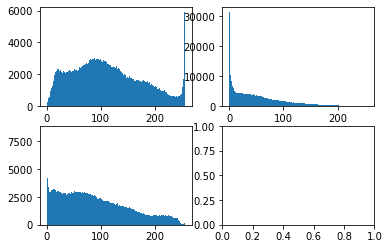

In [38]:
fig,ax = plt.subplots(2,2, figsize=(6,4))

ax[0,0].hist(red.ravel(),bins=256)
ax[1,0].hist(green.ravel(),bins=256)
ax[0,1].hist(blue.ravel(),bins=256)
plt.show()

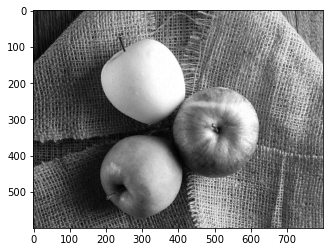

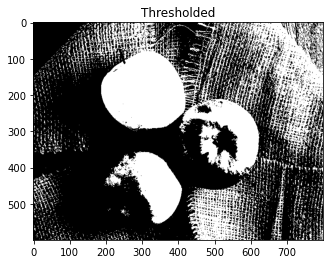

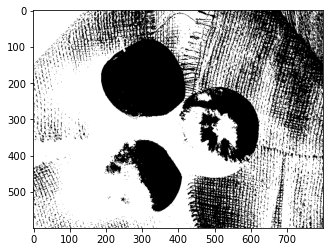

In [43]:
thresh=127
binary=red>127

fig,ax = plt.subplots(figsize=(6,4))
ax.imshow(red,cmap='gray')
plt.show()
fig,ax = plt.subplots(figsize=(6,4))
ax.imshow(binary,cmap='gray')
plt.title('Thresholded')
plt.show()

inverted_binary=red <=thresh
fig,ax = plt.subplots(figsize=(6,4))
ax.imshow(inverted_binary,cmap='gray')
plt.show()

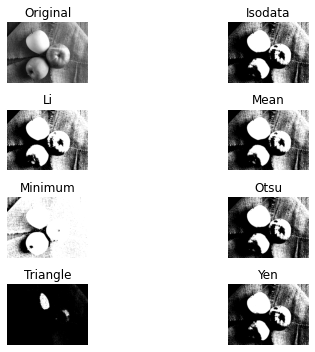

In [40]:
fig, ax = try_all_threshold(red, verbose=False)

#show_plot(fig,ax)

123


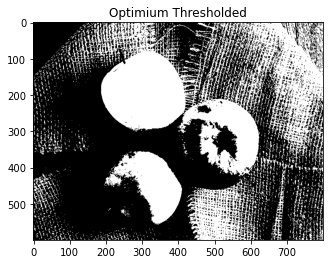

In [44]:
#obtain the optimal threshold value
thresh=threshold_otsu(red)

print(thresh)
#apply the thresholding to the image
binary_global = red> thresh

fig,ax = plt.subplots(figsize=(6,4))
ax.imshow(binary_global,cmap='gray')
plt.title('Optimium Thresholded')
plt.show()

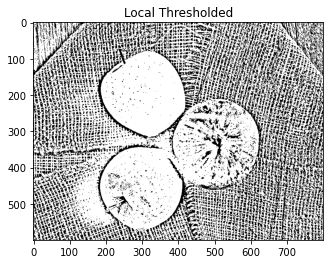

In [45]:
block_size=35

local_thresh= threshold_local(red, block_size,offset=10)

#apply the thresholding to the image
binary_global = red> local_thresh

fig,ax = plt.subplots(figsize=(6,4))
ax.imshow(binary_global,cmap='gray')
plt.title('Local Thresholded')
plt.show()

In [48]:
def plot_comparision(original,filtered, title_filtered):
        fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(6,4), sharex=True, sharey=True)
        
        ax1.imshow(original,cmap=plt.cm.gray)
        ax1.set_title('original')
        ax1.axis('off')

        ax2.imshow(filtered,cmap=plt.cm.gray)
        ax2.set_title(title_filtered)
        ax2.axis('off')
        

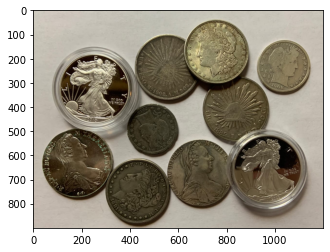

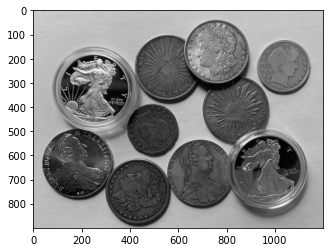

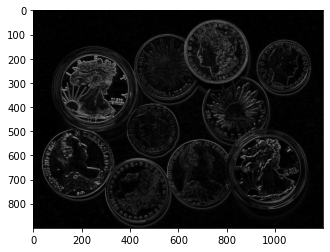

In [49]:
coins_image=plt.imread('coins.jpg')
plt.imshow(coins_image)
plt.show()

fig,ax = plt.subplots(figsize=(6,4))
coins_grayscale_image=rgb2gray(coins_image)
ax.imshow(coins_grayscale_image)
plt.show()

coins_edge_image=sobel(coins_grayscale_image)

fig,ax = plt.subplots(figsize=(6,4))
ax.imshow(coins_edge_image)
plt.show()




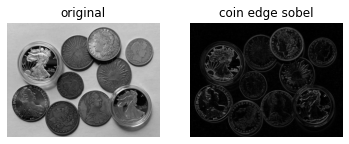

In [50]:
plot_comparision(coins_grayscale_image, coins_edge_image,"coin edge sobel")

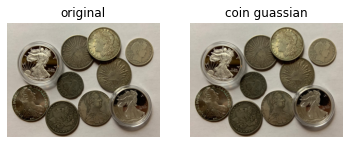

In [51]:
gaussian_image = gaussian(coins_image, multichannel=True)
plot_comparision(coins_image,gaussian_image,"coin guassian")

(array([17603.,  7185.,  8063., 10018.,  8646.,  7660.,  7319.,  6707.,
         6384.,  6435.,  6248.,  6014.,  6062.,  5947.,  6004.,  6147.,
         6159.,  6382.,  6385.,  6399.,  6722.,  6848.,  7124.,  7414.,
         7823.,  8216.,  8673.,  9014.,  9364.,  9451.,  9890., 10079.,
        10379., 10528., 10930., 11423., 11602., 12226., 12672., 12969.,
        13700., 14214., 14506., 14743., 15003., 15132., 15113., 15552.,
        15799., 16139., 16076., 16399., 16745., 17040., 16908., 17198.,
        16726., 17160., 17456., 17329., 17736., 17843., 17825., 18175.,
        18150., 18467., 18476., 18303., 18187., 18317., 18315., 18247.,
        18063., 17720., 17565., 17495., 17475., 17438., 17400., 17258.,
        17593., 17272., 17601., 17236., 16975., 16839., 17083., 16530.,
        16714., 16100., 16231., 16180., 15911., 15717., 15253., 15100.,
        14898., 14220., 13771., 13356., 13150., 12869., 12570., 12220.,
        11967., 11363., 11225., 11080., 11098., 10952., 10486., 

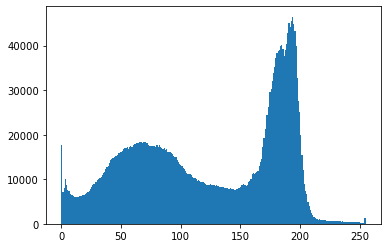

In [52]:
plt.hist(coins_image.ravel(),bins=256)

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


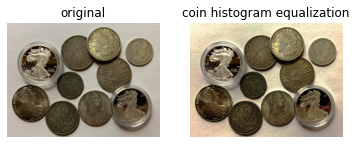

In [53]:
image_eq= exposure.equalize_hist(coins_image)

plot_comparision(coins_image,image_eq,"coin histogram equalization")

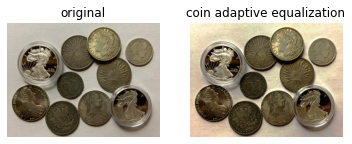

In [54]:
image_adapteq = exposure.equalize_adapthist(coins_image,clip_limit=0.03)
plot_comparision(coins_image,image_eq,"coin adaptive equalization")

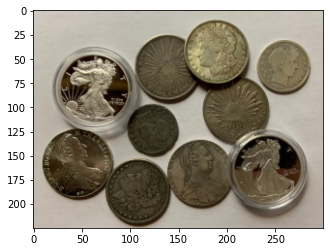

In [55]:

rescaled_image=rescale(coins_image,1/4, anti_aliasing=True, multichannel=True)
                       
plt.imshow(rescaled_image)


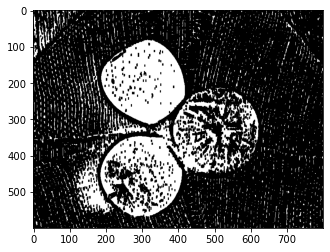

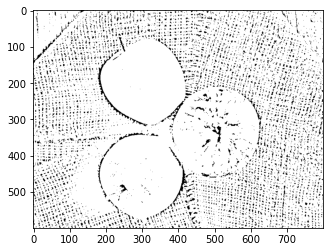

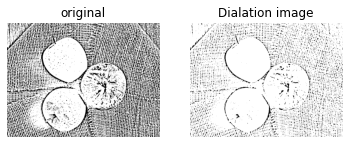

In [56]:
selem=morphology.rectangle(6,3)

eroded_image=morphology.binary_erosion(binary_global,selem=selem)

plt.imshow(eroded_image)
plt.show()

dilated_image = morphology.binary_dilation(binary_global)

plt.imshow(dilated_image)
plt.show()

plot_comparision(binary_global,dilated_image,"Dialation image")

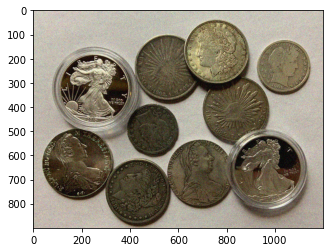

In [57]:
noisy_image = random_noise(coins_image)

fig,ax=plt.subplots(figsize=(6,4))

ax.imshow(noisy_image)
plt.show()

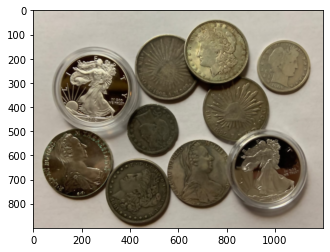

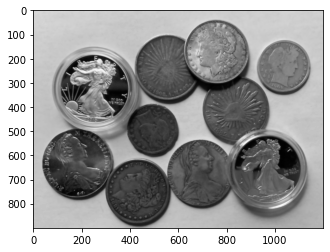

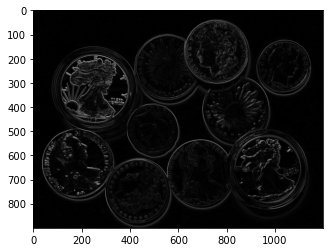

In [58]:
denoise_image = denoise_tv_chambolle(coins_image, weight=0.1, multichannel=True)

fig,ax=plt.subplots(figsize=(6,4))

ax.imshow(denoise_image)
plt.show()


fig,ax=plt.subplots(figsize=(6,4))

coins_grayscale_image=rgb2gray(denoise_image)
ax.imshow(coins_grayscale_image)
plt.show()

fig,ax=plt.subplots(figsize=(6,4))

coins_edge_image=sobel(coins_grayscale_image)

ax.imshow(coins_edge_image)
plt.show()




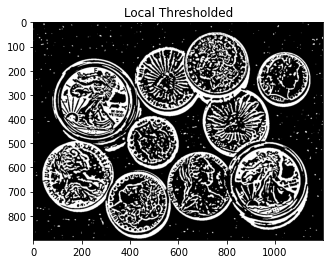

In [59]:
fig,ax=plt.subplots(figsize=(6,4))

block_size=35

coins_grayscale_image=rgb2gray(denoise_image)
local_thresh= threshold_local(coins_grayscale_image, block_size,offset=.01)

#apply the thresholding to the image
#local_thresh=threshold_otsu(coins_grayscale_image)
binary_global = coins_grayscale_image<local_thresh

ax.imshow(binary_global,cmap='gray')
plt.title('Local Thresholded')
plt.show()


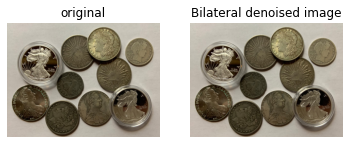

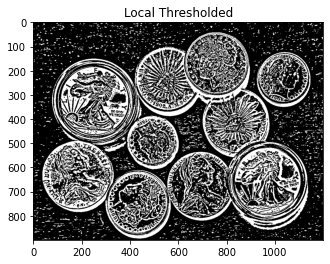

bilateral denoise does the best for removing noise in the background


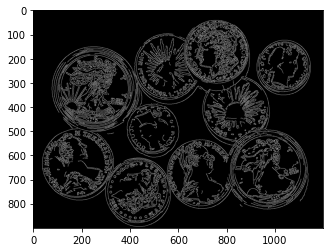

In [60]:
denoised_image=denoise_bilateral(coins_image,multichannel=True)

plot_comparision(coins_image,denoised_image,"Bilateral denoised image")

plt.show()

coins_grayscale_image=rgb2gray(denoised_image)
local_thresh= threshold_local(coins_grayscale_image, block_size,offset=.01)
#apply the thresholding to the image
#local_thresh=threshold_otsu(coins_grayscale_image)
binary_global = coins_grayscale_image<local_thresh

fig,ax=plt.subplots(figsize=(6,4))
ax.imshow(binary_global,cmap='gray')
plt.title('Local Thresholded')
plt.show()

print ('bilateral denoise does the best for removing noise in the background')

#coins_canny_edges=canny(binary_global)
coins_canny_edges=canny(coins_grayscale_image,sigma=1.5)
fig,ax=plt.subplots(figsize=(6,4))
ax.imshow(coins_canny_edges)
plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """Entry point for launching an IPython kernel.
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  after removing the cwd from sys.path.


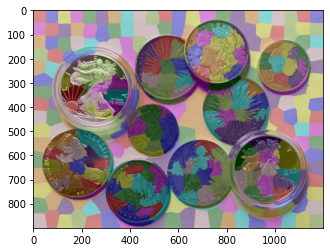

In [61]:
segments= slic(coins_image,n_segments=400)

#segmented_image=label2rgb(segments,coins_image,kind='avg')
segmented_image=label2rgb(segments,coins_image)

fig,ax=plt.subplots(figsize=(6,4))
ax.imshow(segmented_image)
plt.show()

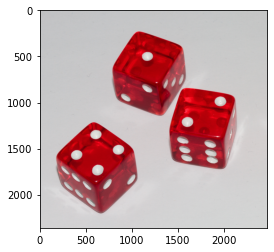

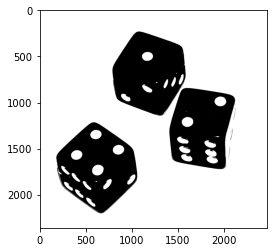

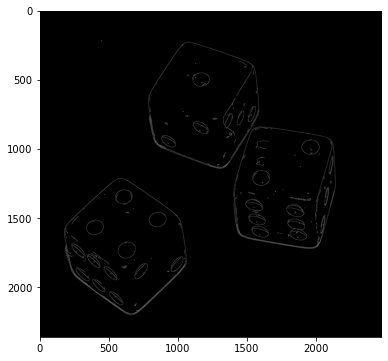

In [62]:
dice_image=plt.imread('dice.jpg')

fig,ax=plt.subplots(figsize=(6,4))

ax.imshow(dice_image)

dice_grayscale_image=rgb2gray(dice_image)

thresh=threshold_otsu(dice_grayscale_image)

dice_threshold_image=dice_grayscale_image>thresh

fig,ax=plt.subplots(figsize=(6,4))

ax.imshow(dice_threshold_image)


dice_canny_edges=canny(dice_grayscale_image)
fig,ax=plt.subplots(figsize=(8,6))
ax.imshow(dice_canny_edges)
plt.show()



In [63]:
contours=measure.find_contours(dice_threshold_image,0.8)

#for contour in contours:
    #print(contour.shape)
    #fig,ax=plt.subplots(figsize=(20,12))
    #ax.imshow(contour)

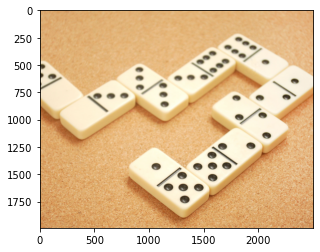

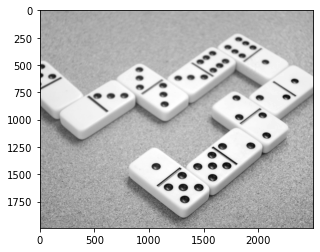

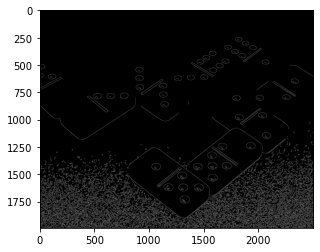

In [65]:
dominos_image=plt.imread('dominos.jpg')

fig,ax=plt.subplots(figsize=(6,4))

ax.imshow(dominos_image)
plt.show()

dominos_grayscale_image=rgb2gray(dominos_image)

fig,ax=plt.subplots(figsize=(6,4))

ax.imshow(dominos_grayscale_image)
plt.show()

dominos_canny_edges=canny(dominos_grayscale_image,sigma=1.2)
fig,ax=plt.subplots(figsize=(6,4))
ax.imshow(dominos_canny_edges)
plt.show()




C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.
  This is separate from the ipykernel package so we can avoid doing imports until


A total of  4 corners were detected


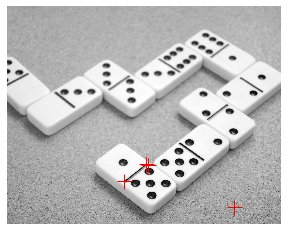

In [66]:
dominos_grayscale_image=rgb2gray(dominos_image)

coords = corner_peaks(corner_harris(dominos_grayscale_image), min_distance=2)
print("A total of ", len(coords), "corners were detected")

fig,ax=plt.subplots(figsize=(6,4))
ax.imshow(dominos_grayscale_image, interpolation='nearest', cmap='gray')
ax.plot(coords[:,1],coords[:,0],'+r',markersize=15)
plt.axis('off')
#ax.imshow(coords)
plt.show()


In [67]:
def show_detected_face(result, detected, title="Face image"):
    plt.imshow(result)
    img_desc=plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        img_desc.add_patch(
                Rectangle(
                (patch['c'],patch['r']),patch['width'],patch['height'],\
                fill=False,color='r',linewidth=2))
    plt.show()


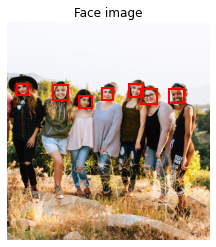

In [68]:
face_image=plt.imread('friends.jpg')

height=face_image.shape[0]/1
width=face_image.shape[1]/1

#print(height,width)

face_image=resize(face_image,(height,width))

fig,ax=plt.subplots(figsize=(6,4))
plt.imshow(face_image)

trained_file=lbp_frontal_face_cascade_filename()

detector = Cascade(trained_file)

#scalefactor: Parameter specifying how much the image size is reduced  at each image scale
#minSize: Minimum possible object size
#maxSize: Maximum possible object size

detected = detector.detect_multi_scale(img=face_image,  
    scale_factor=1.2,
    step_ratio=1,
    min_size=(10,10),
    max_size=(1000,1000))


show_detected_face(face_image,detected)